In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
def plot_df(df,x_axis):
    metrics = ["auROC", "f1", "mAP", "acc"]
    fig, ax = plt.subplots(1, len(metrics), figsize=(23, 3))
    for i, metric in enumerate(metrics):
        ax[i].scatter(df[x_axis], df[metric], marker="x",color="red")
        ax[i].set_ylabel(metric)
        ax[i].set_xlabel(x_axis)
        ax[i].grid(True)
        ax[i].title.set_text(f'Improv. of {metric} w/ {x_axis}')
    plt.show()


						 Incrimental Improvement on Top of:  TCN SYNCNET SPEECH ang
auROC    0.985044
f1       0.903510
mAP      0.979333
acc      0.949166
Name: 0, dtype: float64


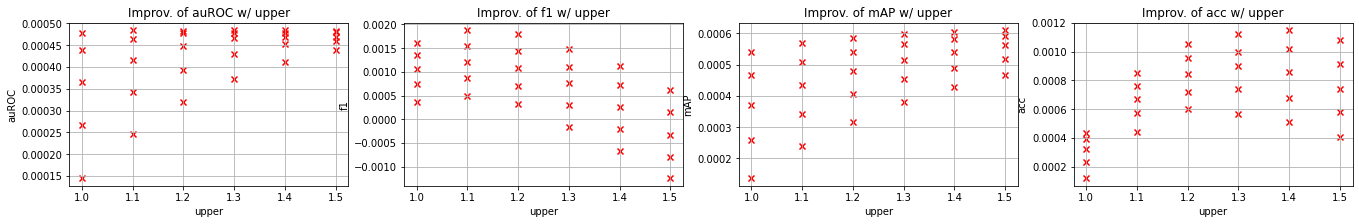

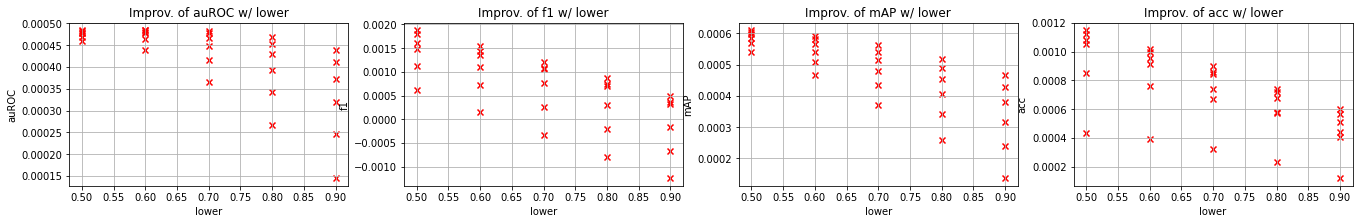

In [35]:
def load_df(model,feature,label,gaze_feat, model_trainer=""):
    print("\n\t\t\t\t\t\t Incrimental Improvement on Top of: ",model,feature,label,gaze_feat)
    df = pd.read_csv(f"{model}_{feature}_{label}_{gaze_feat}_metrics{model_trainer}.csv")
    baseline = df.iloc[0]
    print(baseline[["auROC", "f1", "mAP", "acc"]])
    df = df.iloc[1:]
    if gaze_feat=="ang":
        plot_df(df,"upper")
        plot_df(df,"lower")
    if gaze_feat=="at":
        plot_df(df,"base")
        plot_df(df,"perc")

    return df, baseline
    
_,_ = load_df("TCN","SYNCNET","SPEECH","ang")


						 Incrimental Improvement on Top of:  TCN SYNCNET SPEECH at
auROC    0.985044
f1       0.903510
mAP      0.979333
acc      0.949166
Name: 0, dtype: float64


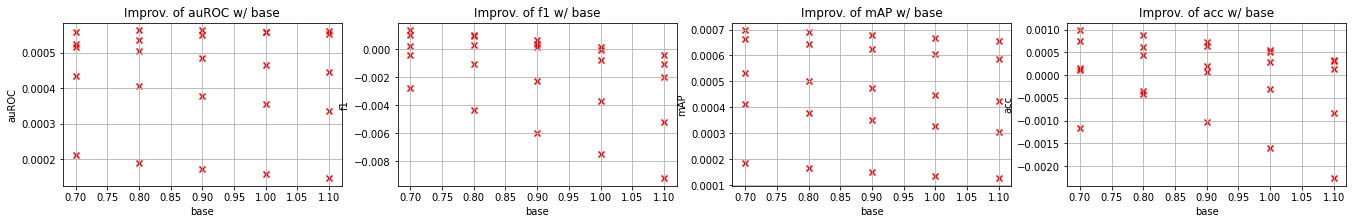

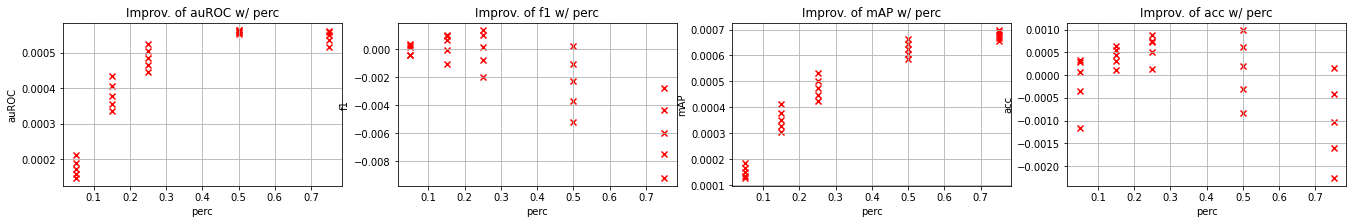


						 Incrimental Improvement on Top of:  TCN SYNCNET SPEECH ang
auROC    0.985044
f1       0.903510
mAP      0.979333
acc      0.949166
Name: 0, dtype: float64


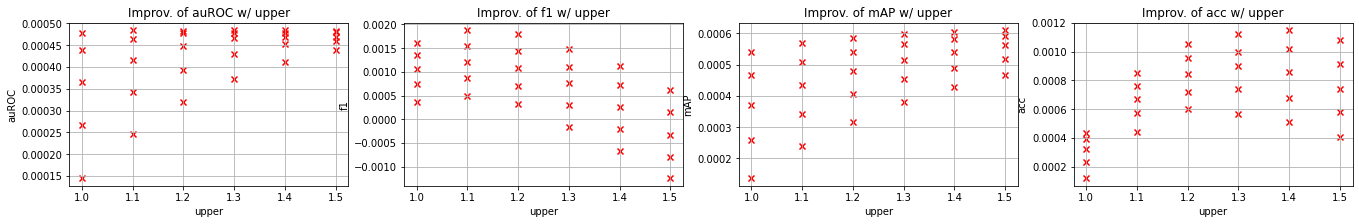

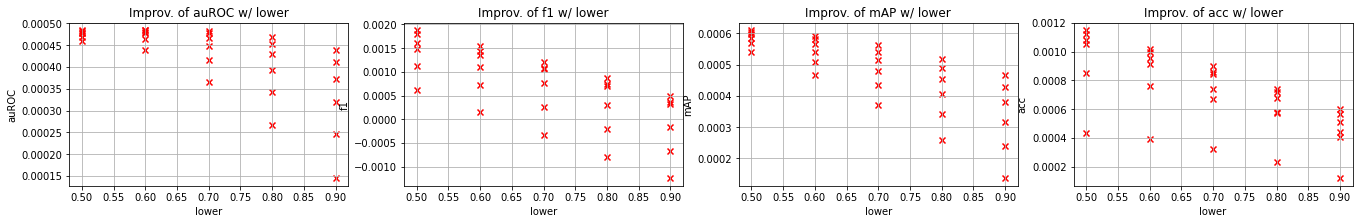


						 Incrimental Improvement on Top of:  TCN PERFECTMATCH SPEECH at
auROC    0.988619
f1       0.918375
mAP      0.984348
acc      0.956366
Name: 0, dtype: float64


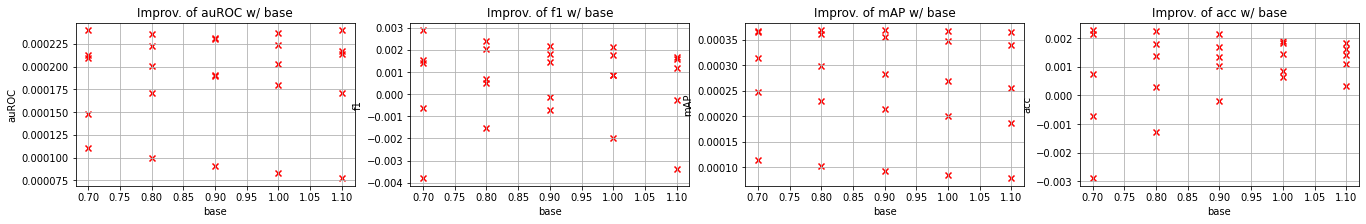

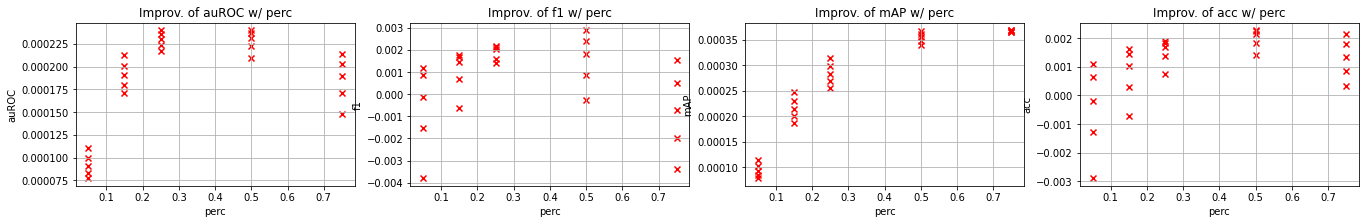


						 Incrimental Improvement on Top of:  TCN PERFECTMATCH SPEECH ang
auROC    0.988619
f1       0.918375
mAP      0.984348
acc      0.956366
Name: 0, dtype: float64


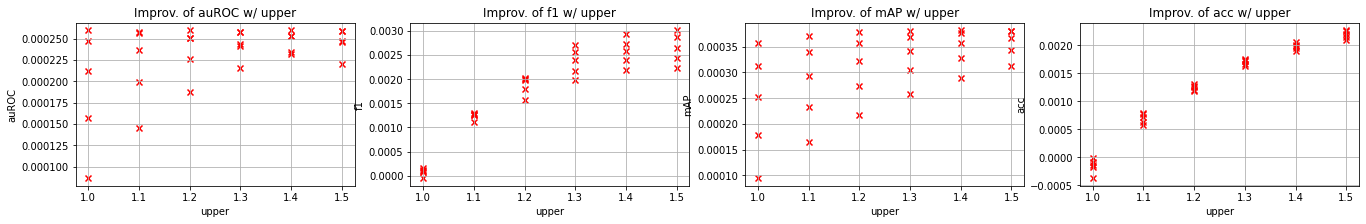

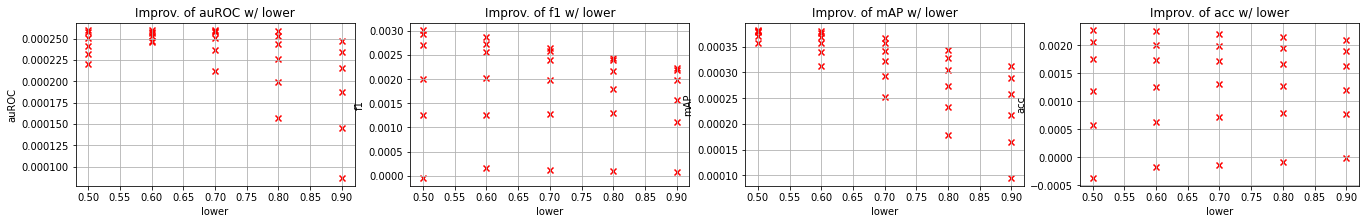


						 Incrimental Improvement on Top of:  TCN SYNCNET TURN at
auROC    0.983902
f1       0.904546
mAP      0.976855
acc      0.949619
Name: 0, dtype: float64


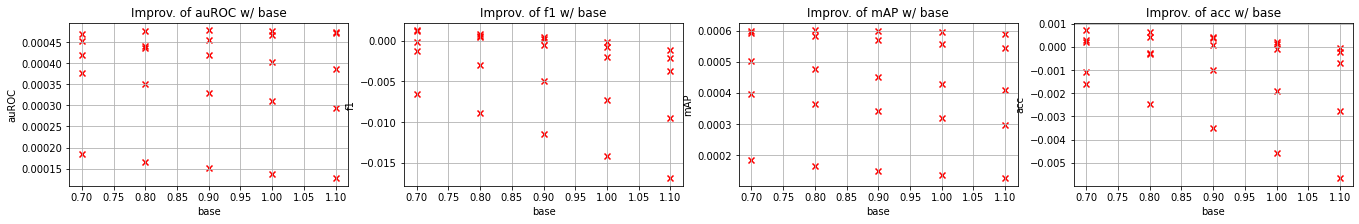

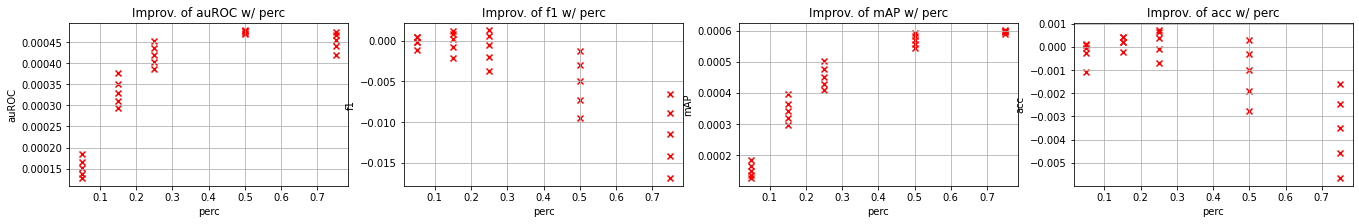


						 Incrimental Improvement on Top of:  TCN SYNCNET TURN ang
auROC    0.983902
f1       0.904546
mAP      0.976855
acc      0.949619
Name: 0, dtype: float64


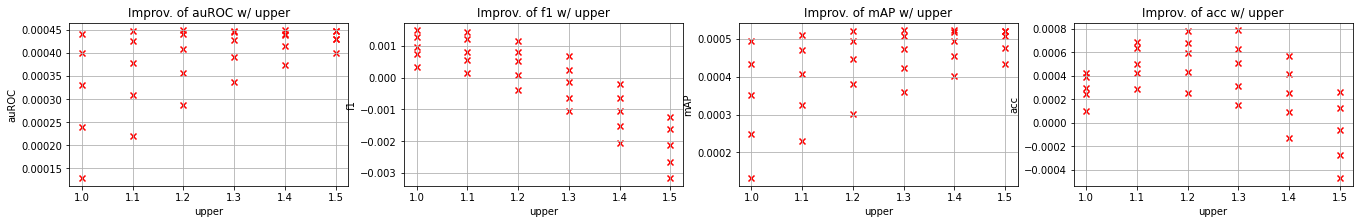

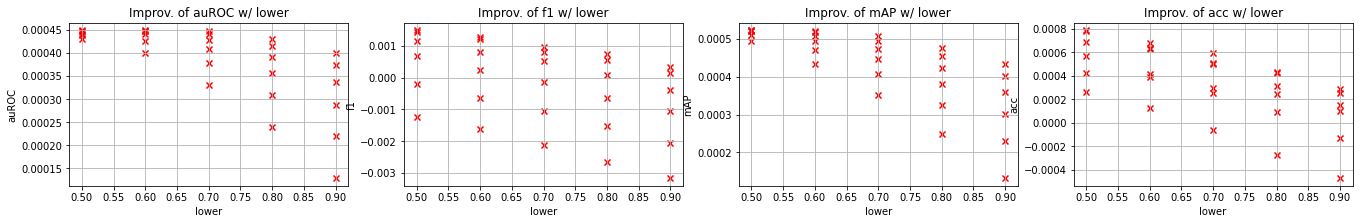


						 Incrimental Improvement on Top of:  TCN PERFECTMATCH TURN at
auROC    0.975917
f1       0.883786
mAP      0.966202
acc      0.938464
Name: 0, dtype: float64


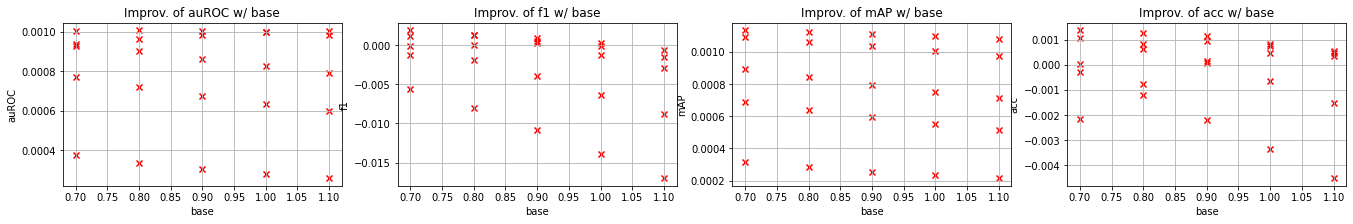

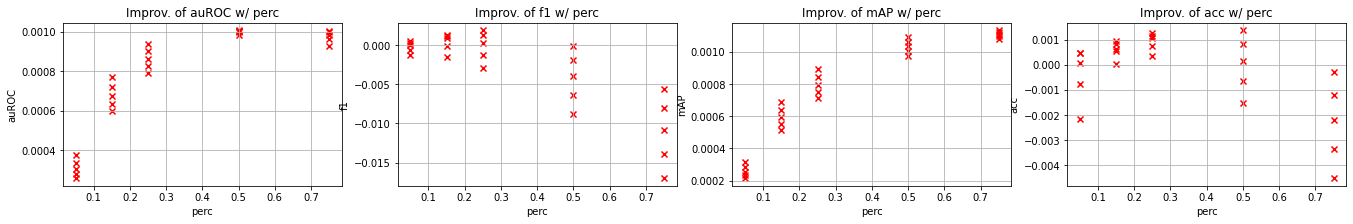


						 Incrimental Improvement on Top of:  TCN PERFECTMATCH TURN ang
auROC    0.975917
f1       0.883786
mAP      0.966202
acc      0.938464
Name: 0, dtype: float64


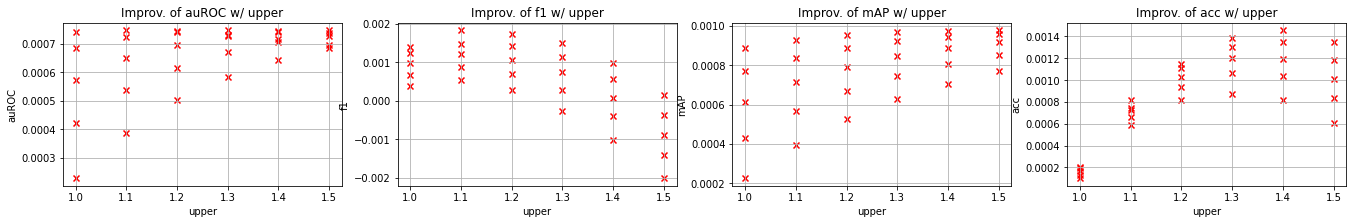

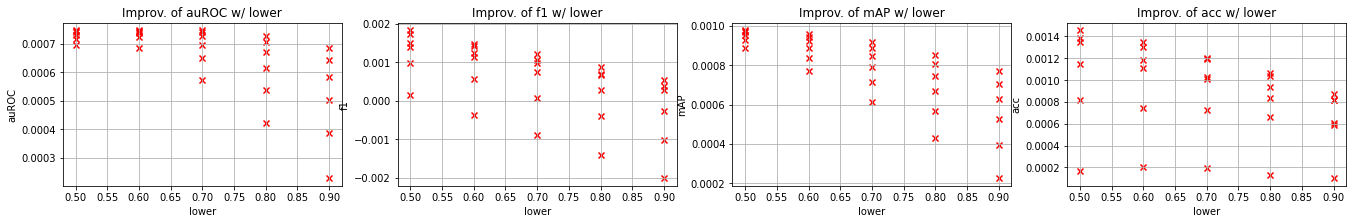

In [31]:
for model in ["TCN"]:
    for labels in ["SPEECH", "TURN"]:
        for features in ["SYNCNET","PERFECTMATCH"]:
            for gaze in ["at","ang"]:
                load_df(model,features,labels,gaze)
# _,_ = load_df("TCN","SYNCNET","SPEECH","at")


						 Incrimental Improvement on Top of:  BLSTM SYNCNET SPEECH at
auROC    0.662173
f1       0.447284
mAP      0.637353
acc      0.481277
Name: 0, dtype: float64


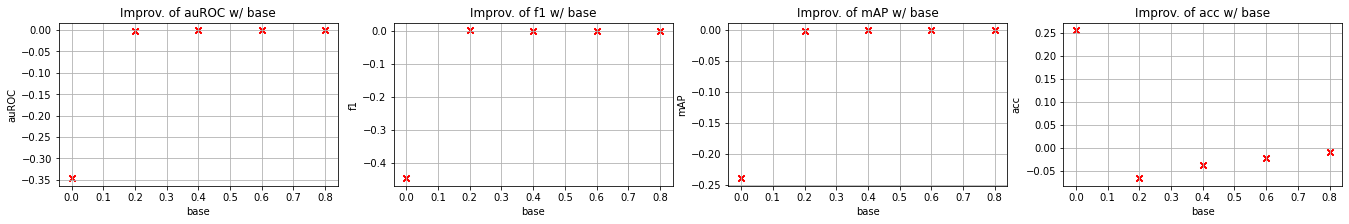

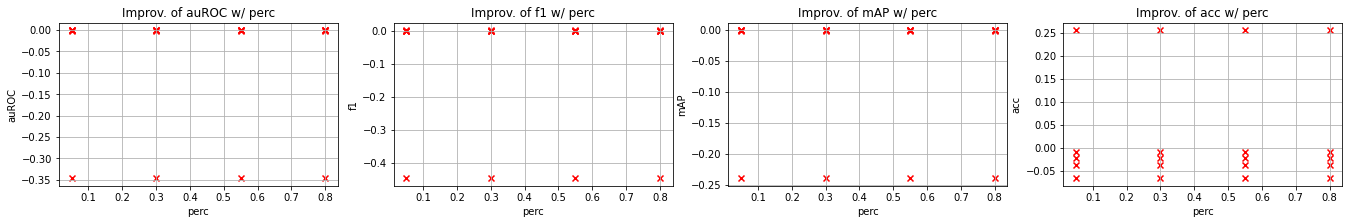


						 Incrimental Improvement on Top of:  BLSTM SYNCNET SPEECH ang
auROC    0.662173
f1       0.447284
mAP      0.637353
acc      0.481277
Name: 0, dtype: float64


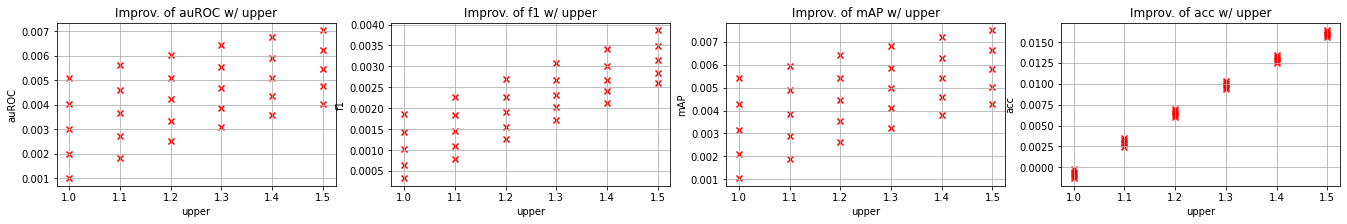

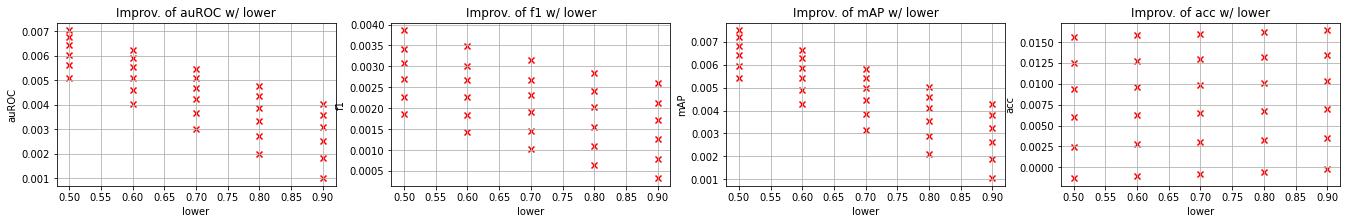


						 Incrimental Improvement on Top of:  BLSTM PERFECTMATCH SPEECH at
auROC    0.689606
f1       0.449786
mAP      0.683949
acc      0.460063
Name: 0, dtype: float64


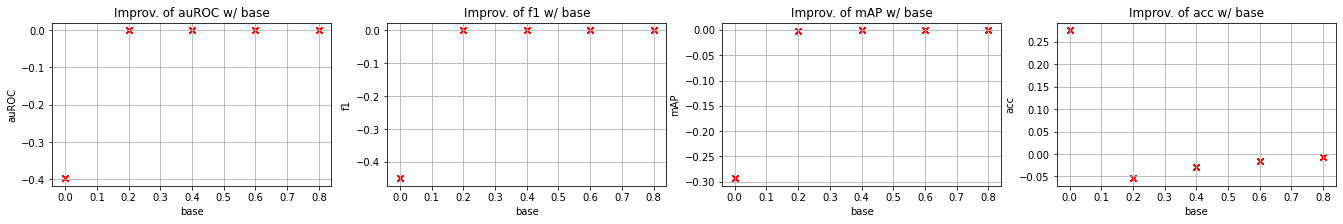

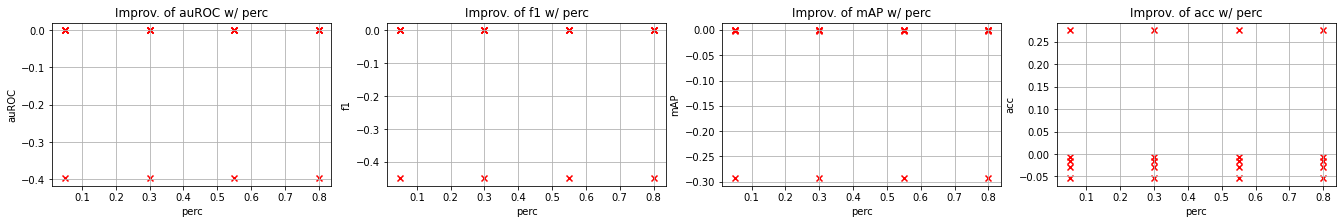


						 Incrimental Improvement on Top of:  BLSTM PERFECTMATCH SPEECH ang
auROC    0.689606
f1       0.449786
mAP      0.683949
acc      0.460063
Name: 0, dtype: float64


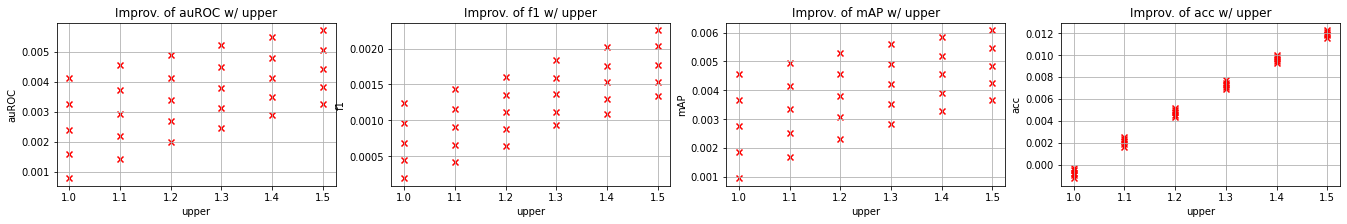

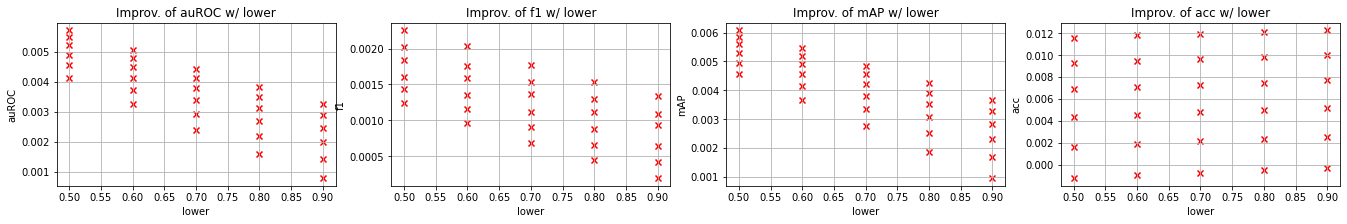

In [37]:
for model in ["BLSTM"]:
    for labels in ["SPEECH"]:
        for features in ["SYNCNET","PERFECTMATCH"]:
            for gaze in ["at","ang"]:
                load_df(model,features,labels,gaze, model_trainer="kalin")